### **Pytorch** Gradients ( Derivatives )

In [33]:
# libraries 
import torch
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
plt.style.use('seaborn-whitegrid')
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [34]:
# get epoch
import datetime
! ../../epochgen.py ef
datetime.datetime.now()

Epoch ~ (2020-11-16 16:24:31.661281)
Decomposed Date ~  November 16, 2020;


datetime.datetime(2020, 11, 16, 16, 24, 31, 769932)

### Table of Contents
***
- Derivatives 
- Partial Derivatives 
- Gradient Checking?

In [35]:
x = torch.tensor(2.0,requires_grad = True)

In [36]:
x

tensor(2., requires_grad=True)

In [37]:
x.dtype

torch.float32

In [38]:
# function
# y = x^2
y = x ** 2
print('result of the function y : ',y.item())

result of the function y :  4.0


In [39]:
# derivative
y.backward() # this calculates the derivative, the function is internally changed to 2x
print("the derivative at x = 2 ->", x.grad)

the derivative at x = 2 -> tensor(4.)


- $\\frac{\\mathrm{dy(x)}}{\\mathrm{dx}}=2x$ 

- $\\frac{\\mathrm{dy(x=2)}}{\\mathrm{dx}}=2(2)=4$


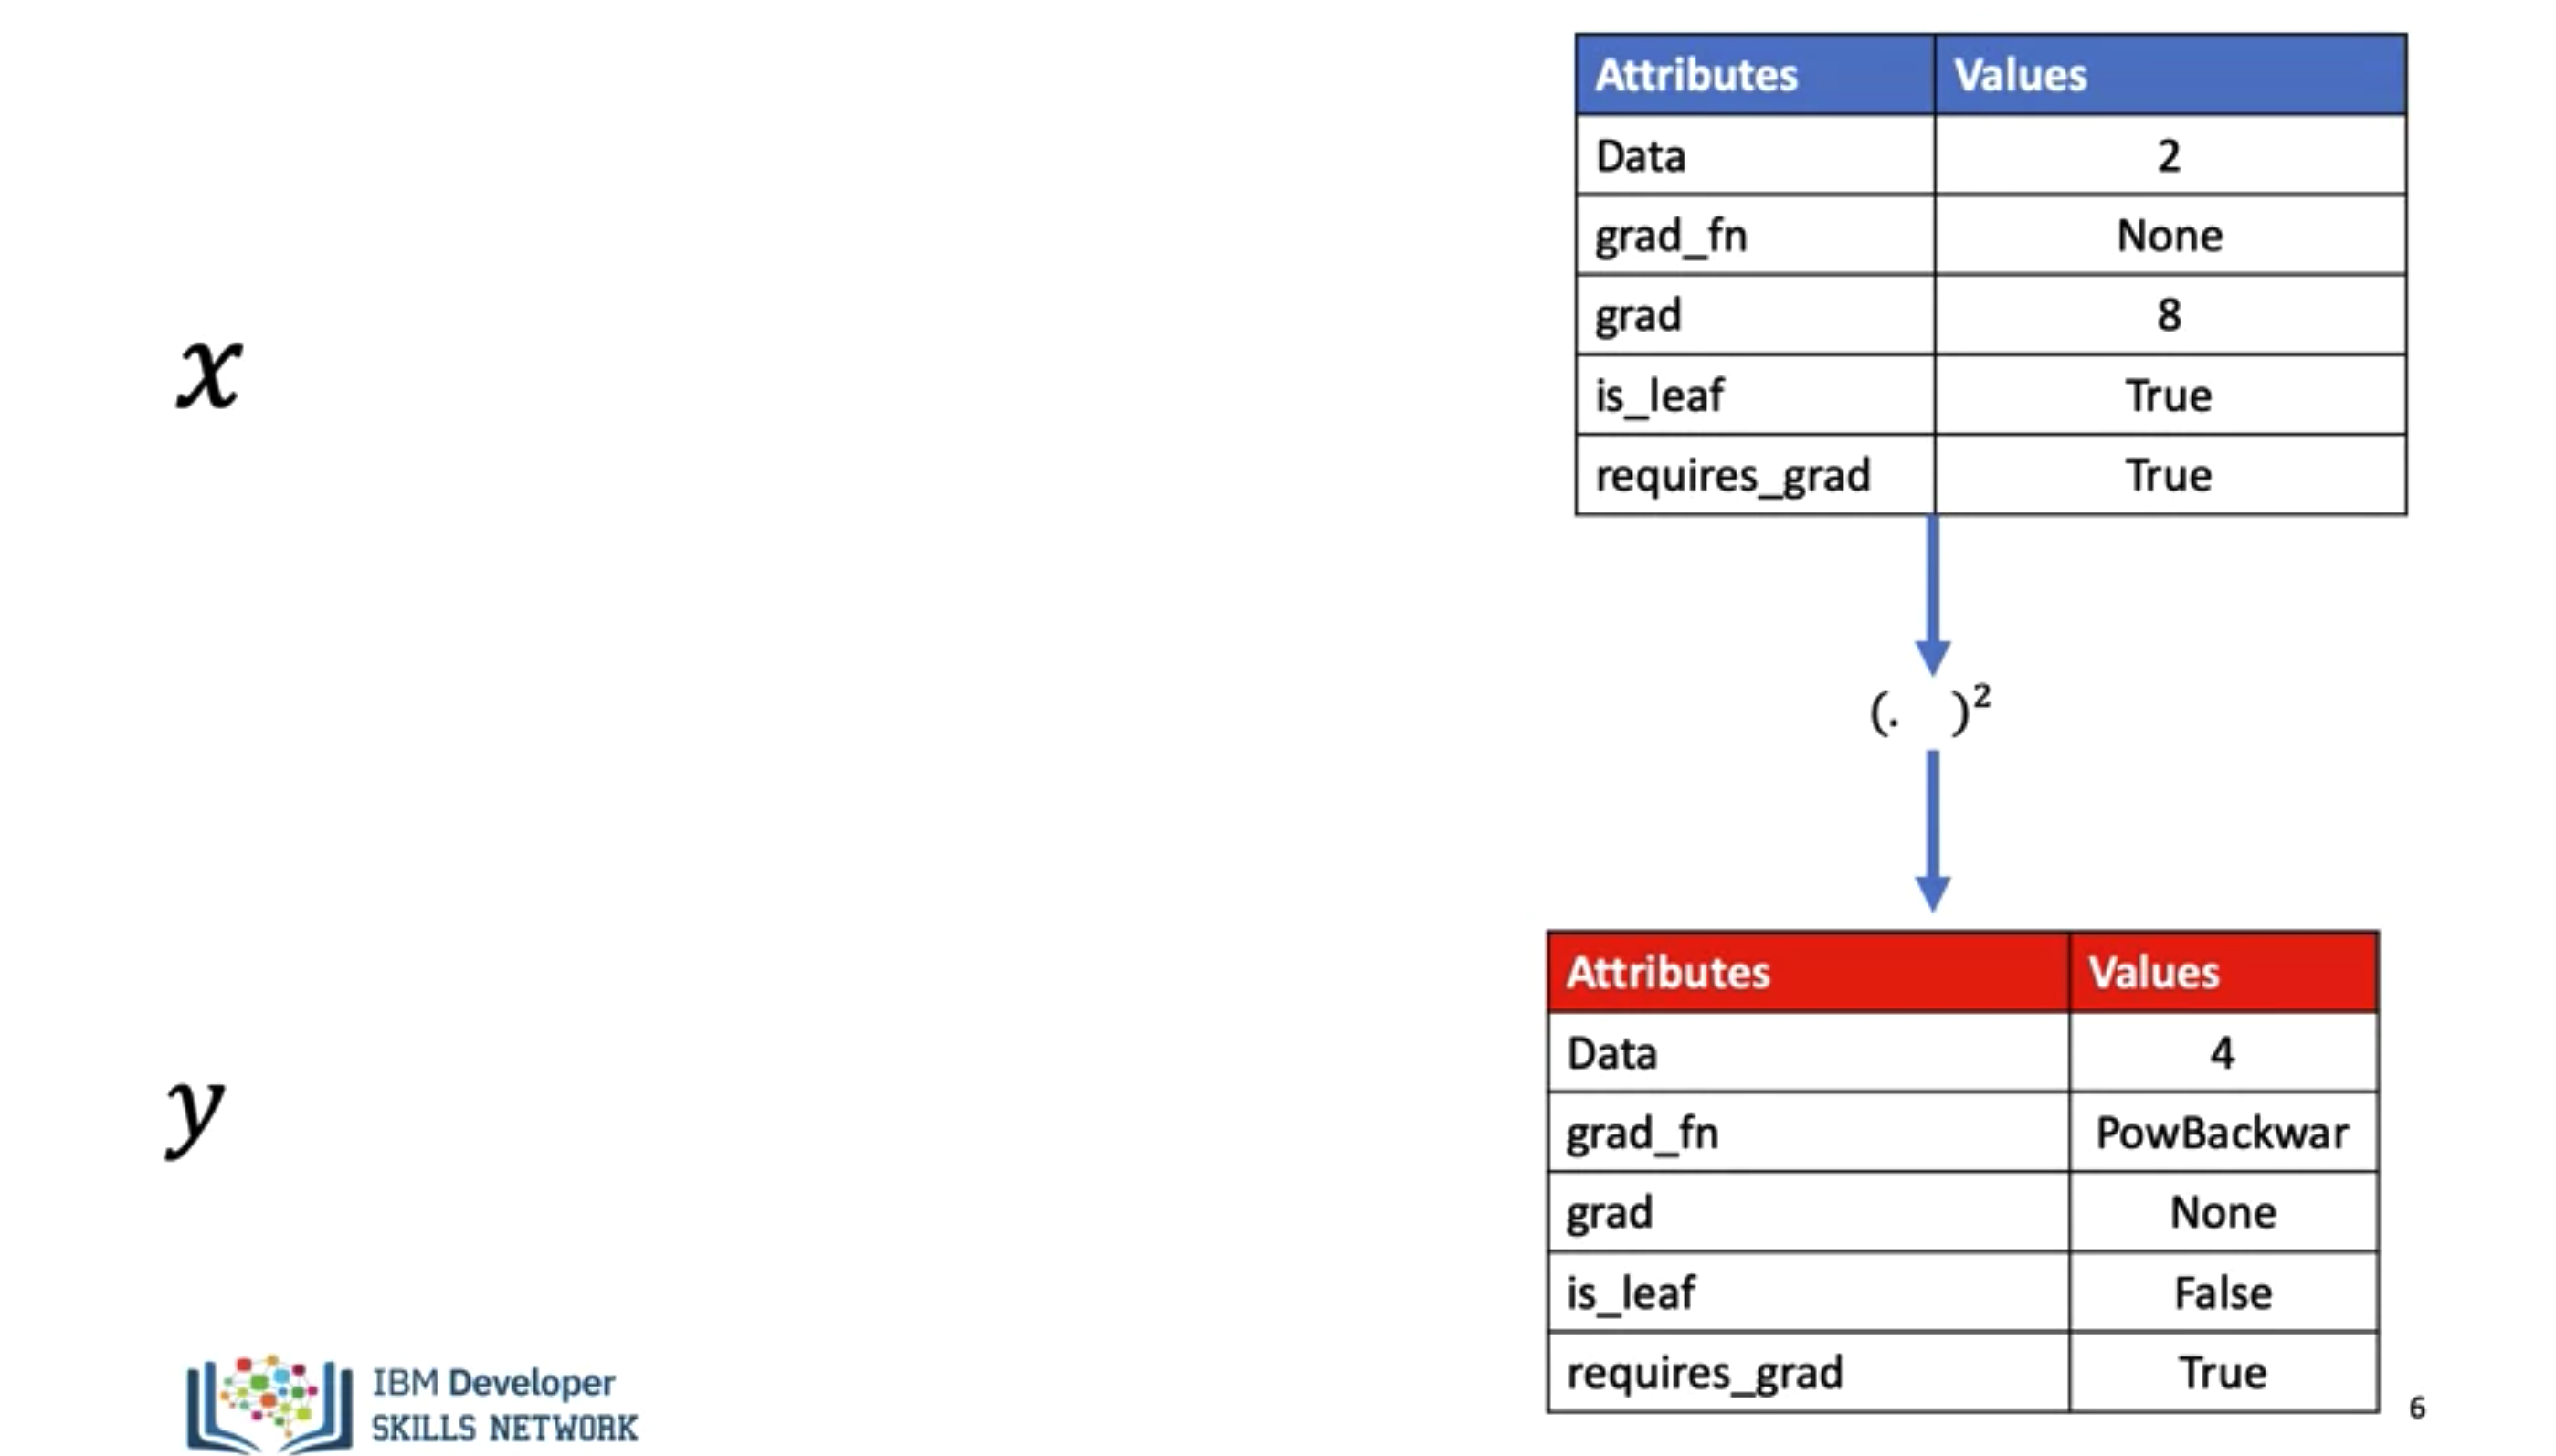

In [40]:
# X
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [41]:
# Y
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7f81c6996b50>
grad: None
is_leaf: False
requires_grad: True


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  after removing the cwd from sys.path.


In [42]:
# more complication

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1

In [43]:
# y when x is substituted
print('result of y equation ~ ', y)

result of y equation ~  tensor(9., grad_fn=<AddBackward0>)


In [44]:
y.backward() # derivative

In [45]:
x.grad # x when substituted in the derivated y function

tensor(6.)

- The function is in the following form:
$y=x^{2}+2x+1$
- $\\frac{\\mathrm{dy(x)}}{\\mathrm{dx}}=2x+2$

- $\\frac{\\mathrm{dy(x=2)}}{\\mathrm{dx}}=2(2)+2=6$



In [46]:
# one more example
x = torch.tensor(1.0,requires_grad=True)
# function
y = 2*x**3 + x


In [47]:
print('x in y : ',y)

x in y :  tensor(3., grad_fn=<AddBackward0>)


In [48]:
# derivative 
y.backward()

In [49]:
# gradient
x.grad

tensor(7.)

In [50]:
# after derivative 
y = 6*x**2 + 1
print(' X in derivative of y -> ', y)

 X in derivative of y ->  tensor(7., grad_fn=<AddBackward0>)


### Partial Derivatives

In [51]:
# two tensors
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
# fucntion
f = u * v + u **2 
print('Result of the function : ', f)

Result of the function :  tensor(3., grad_fn=<AddBackward0>)


$f(u=1,v=2)=(2)(1)+1^{2}=3$ 


In [52]:
# partial Derivative with respect to u
f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


X was  Scalar for most of the above examples, what is the case where x is a vector ( which is almost every case in a typical deeplearning problem ) 

In [53]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

In [54]:
x

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)

In [55]:
print('The value of function y : ',Y)
print('The value of function y.sum() : ',y)

The value of function y :  tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
The value of function y.sum() :  tensor(407.4074, grad_fn=<SumBackward0>)


In [56]:
# derivative of y 
y.backward()

In [57]:
x.grad

tensor([-20.0000, -15.5556, -11.1111,  -6.6667,  -2.2222,   2.2222,   6.6667,
         11.1111,  15.5556,  20.0000])

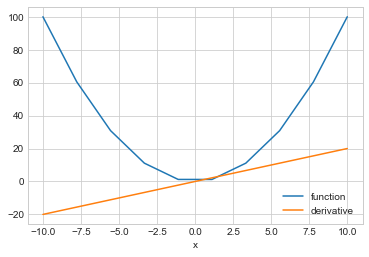

In [58]:

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.


The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">Click Here</a>


### Gradient of ReLu

In [59]:
x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)

In [60]:
# plt.plot(x.numpy(), Y.numpy(), label = 'function')
# this explains why detach is used, initially X vector is bound with the argument 
# requires_grad = True, it means torch tracks the history of changes made
# and y is a fucntion of x, which in whole means it cannot be simply converted to a numpy array
# in which all of this doesn't exist, so we 'detach' the functionality.

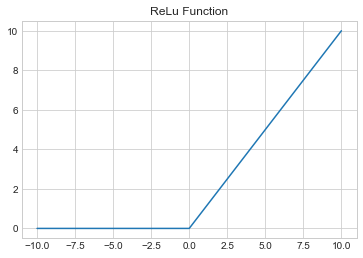

In [61]:
plt.title('ReLu Function')
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')

In [62]:
# gradient of Relu
y = Y.sum()
y.backward()


In [64]:
x.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

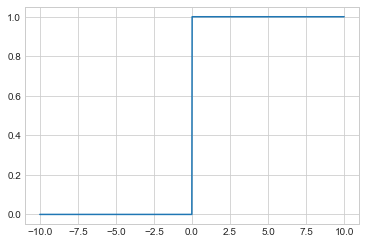

In [63]:
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')

### Contrast Between Normal ReLu and Gradient

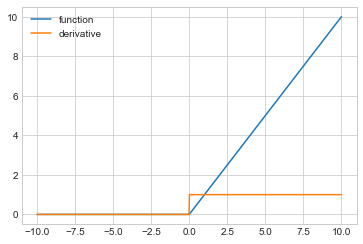

In [66]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.legend()